<a href="https://colab.research.google.com/github/HIsu1231/AI_INOVATION_SQUARE/blob/master/CNN_3conv_1flatten_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 1.5

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `1.5`. This will be interpreted as: `1.x`.


TensorFlow 1.x selected.


In [2]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import numpy as np
from datetime import datetime

mnist = input_data.read_data_sets('MNIST/data', one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST/data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST/data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST/data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py fr

In [3]:
i_nodes = mnist.train.images.shape[1]
o_nodes = mnist.train.labels.shape[1]

#hyper_parameter
learning_rate = 0.001
epochs = 30
batch_size = 100

In [4]:
X = tf.placeholder(tf.float32, [None,i_nodes])
T = tf.placeholder(tf.float32, [None,o_nodes])

#28X28X1
A1 = tf.reshape(X, [-1,28,28,1])

In [5]:
#5X5X32 filter
W2 = tf.Variable(tf.random_normal([5,5,1,32], stddev=0.01))
b2 = tf.Variable(tf.random_normal([32]))

#28X28X32
C2 = tf.nn.conv2d(A1, W2, strides=[1,1,1,1], padding='SAME')

Z2 = tf.nn.relu(C2)

#14X14X32
A2 = tf.nn.max_pool(Z2, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')

In [6]:
#5X5X64 filter
W3 = tf.Variable(tf.random_normal([5,5,32,64], stddev=0.01))
b3 = tf.Variable(tf.random_normal([64]))

#14X14X64
C3 = tf.nn.conv2d(A2, W3, strides=[1,1,1,1], padding='SAME')

Z3 = tf.nn.relu(C3)

#7X7X64
A3 = tf.nn.max_pool(Z3, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')

In [7]:
#5X5X128 filter
W4 = tf.Variable(tf.random_normal([5,5,64,128], stddev=0.01))
b4 = tf.Variable(tf.random_normal([128]))

#7X7X128
C4 = tf.nn.conv2d(A3, W4, strides=[1,1,1,1], padding='SAME')

Z4 = tf.nn.relu(C4)

#4X4X128
A4 = tf.nn.max_pool(Z4, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')

In [8]:
A4_flat = tf.reshape(A4,[-1,4*4*128])

W5 = tf.Variable(tf.random_normal([4*4*128,10],stddev=0.01))
b5 = tf.Variable(tf.random_normal([10]))

Z5 = tf.matmul(A4_flat,W5) + b5

y = tf.nn.softmax(Z5)

In [9]:
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=T, logits=Z5))

optimizer = tf.train.AdamOptimizer(learning_rate)

train = optimizer.minimize(loss)

In [10]:
predicted_val = tf.argmax(y,1)

accuracy_index = tf.cast(tf.equal(tf.argmax(y,1), tf.argmax(T,1)), dtype=tf.float32)

accuracy = tf.reduce_mean(accuracy_index)

In [13]:
index_label_prediction = []

with tf.Session() as sess:

    sess.run(tf.global_variables_initializer())

    start_time = datetime.now()

    for i in range(epochs):

        total_batch = int(mnist.train.num_examples / batch_size)

        for step in range(total_batch):

            batch_x_data, batch_t_data = mnist.train.next_batch(batch_size)

            loss_val, _ = sess.run([loss, train], feed_dict={X: batch_x_data, T:batch_t_data})

            if step % 100 == 0:

                print("epochs = ", i+1, ", step = ", step, ", loss value = ", loss_val)

    end_time = datetime.now()

    test_x_data = mnist.test.images
    test_t_data = mnist.test.labels

    accuracy_val, index_label, predicted_list = sess.run([accuracy, accuracy_index, predicted_val], feed_dict={X: test_x_data, T: test_t_data})

    print("\nAccuracy = ", accuracy_val)

    temp_list = []

    for i in range(len(index_label)):

        if index_label[i] == 0:

            temp_list.append(i)
            temp_list.append(np.argmax(test_t_data[i]))
            temp_list.append(predicted_list[i])

            index_label_prediction.append(temp_list)

            temp_list = []

epochs =  1 , step =  0 , loss value =  2.385889
epochs =  1 , step =  100 , loss value =  0.31642243
epochs =  1 , step =  200 , loss value =  0.12674229
epochs =  1 , step =  300 , loss value =  0.07337233
epochs =  1 , step =  400 , loss value =  0.13577962
epochs =  1 , step =  500 , loss value =  0.14520022
epochs =  2 , step =  0 , loss value =  0.036701158
epochs =  2 , step =  100 , loss value =  0.06858744
epochs =  2 , step =  200 , loss value =  0.105095826
epochs =  2 , step =  300 , loss value =  0.12274025
epochs =  2 , step =  400 , loss value =  0.025388129
epochs =  2 , step =  500 , loss value =  0.04521773
epochs =  3 , step =  0 , loss value =  0.036111955
epochs =  3 , step =  100 , loss value =  0.012175619
epochs =  3 , step =  200 , loss value =  0.021188283
epochs =  3 , step =  300 , loss value =  0.04304514
epochs =  3 , step =  400 , loss value =  0.012377163
epochs =  3 , step =  500 , loss value =  0.0029420555
epochs =  4 , step =  0 , loss value =  0.048

In [14]:
print(index_label_prediction)

[[247, 4, 2], [340, 5, 3], [449, 3, 5], [582, 8, 2], [659, 2, 1], [740, 4, 9], [938, 3, 5], [947, 8, 9], [1014, 6, 9], [1039, 7, 1], [1112, 4, 6], [1226, 7, 2], [1232, 9, 4], [1247, 9, 5], [1260, 7, 1], [1393, 5, 3], [1901, 9, 4], [2035, 5, 3], [2070, 7, 9], [2130, 4, 9], [2135, 6, 1], [2293, 9, 2], [2369, 5, 3], [2414, 9, 4], [2597, 5, 3], [2654, 6, 1], [2896, 8, 0], [2939, 9, 5], [2953, 3, 5], [3225, 7, 9], [3422, 6, 0], [3520, 6, 4], [3558, 5, 0], [3853, 6, 0], [3985, 9, 4], [4078, 9, 8], [4199, 7, 9], [4360, 5, 3], [4504, 2, 7], [4761, 9, 8], [4823, 9, 4], [5201, 4, 9], [5654, 7, 2], [5937, 5, 3], [5997, 5, 9], [6576, 7, 1], [6597, 0, 7], [6755, 8, 9], [7216, 0, 6], [8408, 8, 5], [9015, 7, 2], [9540, 1, 8], [9664, 2, 7], [9692, 9, 7], [9729, 5, 6]]


10 image is saved now
20 image is saved now
30 image is saved now
40 image is saved now
50 image is saved now

Elapsed time =  0:00:11.173275
Total  55 data is saved


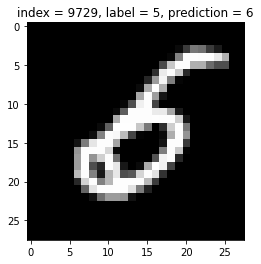

In [19]:
import os
import matplotlib.pyplot as plt
%matplotlib inline

save_count = 0

example_name = 'CNN_Example_5_2'

#현재 디렉토리 저장
cur_dir = os.getcwd()

now = datetime.now()

save_dir_name = example_name + str(now.year) + '-' + str(now.month) + '-' + str(now.day) + '_' + str(now.hour)  + str(now.minute) + str(now.second)

colab_default_dir = './drive/MyDrive/AI_INOVATION_SQUARE/prac'

try:
    os.chdir(colab_default_dir)
    os.mkdir(save_dir_name)

    os.chdir(save_dir_name)

    start_time = datetime.now()

    for list_data in index_label_prediction:

        index_int = list_data[0]
        label_int = list_data[1]
        prediction_int = list_data[2]

        index_str = str(index_int)
        label_str = str(label_int)
        prediction_str = str(prediction_int)

        #인덱스, 정답, 오답을 나타내는 문자열
        index_label_prediction_str = 'index = ' + index_str + ', label = ' + label_str + ', prediction = ' + prediction_str 

        #저장 파일 이름 생성, index_str.png
        save_image_name = index_str + '.png'
        plt.title(index_label_prediction_str)

        img = test_x_data[index_int].reshape(28,28)
        plt.imshow(img, cmap='gray')

        plt.savefig(save_image_name) #파일 저장

        save_count += 1

        if save_count % 10 == 0:

            print(save_count, "image is saved now")

    end_time = datetime.now()

    print("\nElapsed time = ", end_time - start_time)
    print("Total ", save_count, "data is saved")

    os.chdir(cur_dir)

except Exception as err:

  os.chdir(cur_dir)
  print(str(err))
